In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


% load file names 

In [2]:

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\FCR"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\FCR"


In [3]:
import os

# Specify the folder path
folder_path = base_path

# Get a list of all files in the folder
file_names = os.listdir(folder_path)

# Load the CSV files and store them in the dictionary
file_path = os.path.join(folder_path, 'FCR.xlsx')
dataframe = pd.read_excel(file_path, parse_dates=['Datum'])

# delete last row as it contains the total sums of all columns
dataframe = dataframe.iloc[:-1]

In [4]:
dataframe

,Datum,FCR-N Pris (EUR/MW),Total,SE1 FCRN,SE2 FCRN,SE3 FCRN,SE4 FCRN,DK2 FCRN,FCR-D upp Pris (EUR/MW),Total FCRD upp,...,SE3 FCRD upp,SE4 FCRD upp,DK2 FCRD upp,FCR-D ned Pris (EUR/MW),Total FCRD ned,SE1 FCRD ned,SE2 FCRD ned,SE3 FCRD ned,SE4 FCRD ned,DK2 FCRD ned
0,2021-01-01 00:00:00,20.249435,240.0,156.5,70.0,12.0,1.2,0.3,20.324006,454.9,...,0.9,0.0,63.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00,19.887222,244.9,156.2,67.9,12.0,1.2,7.6,20.494503,455.6,...,0.9,0.0,63.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00,19.904164,246.0,156.4,67.9,12.0,1.2,8.5,20.490283,455.9,...,0.9,0.0,63.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-01 03:00:00,19.861533,245.0,156.6,67.9,12.0,1.2,7.3,20.507565,455.4,...,0.9,0.0,59.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-01 04:00:00,19.870957,245.0,156.3,67.9,12.0,1.2,7.6,20.791781,453.1,...,0.9,0.0,62.9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24066,2023-09-30 19:00:00,54.196172,284.8,78.5,172.1,32.5,1.7,0.0,19.290978,660.1,...,168.2,17.2,9.7,50.528538,318.0,6.9,259.9,25.5,15.9,9.8
24067,2023-09-30 20:00:00,55.234162,244.4,53.7,156.5,32.5,1.7,0.0,19.306338,681.9,...,191.2,17.6,9.7,49.483188,318.0,18.9,245.1,29.1,15.8,9.1
24068,2023-09-30 21:00:00,54.657073,238.7,52.6,158.0,26.4,1.7,0.0,19.332631,679.2,...,191.2,17.6,10.0,50.066251,318.0,20.5,247.3,24.5,15.9,9.8
24069,2023-09-30 22:00:00,53.586252,285.5,82.8,174.6,26.4,1.7,0.0,19.130324,661.1,...,170.6,17.7,10.5,51.139788,318.0,0.1,267.3,24.5,15.8,10.3


In [5]:
dataframe['Total FCRD upp'] = dataframe['Total FCRD upp'].replace(0, np.nan)
dataframe['Total FCRD ned'] = dataframe['Total FCRD ned'].replace(0, np.nan)


# Specify the cutoff row index
cutoff_row_index = 10000
# Replace with NaN in column 'A' for all rows before the cutoff
dataframe.loc[:cutoff_row_index, 'DK2 FCRD ned'] = np.nan

In [6]:
# Convert the 'time' column to datetime format
dataframe['Datum'] = pd.to_datetime(dataframe['Datum'])

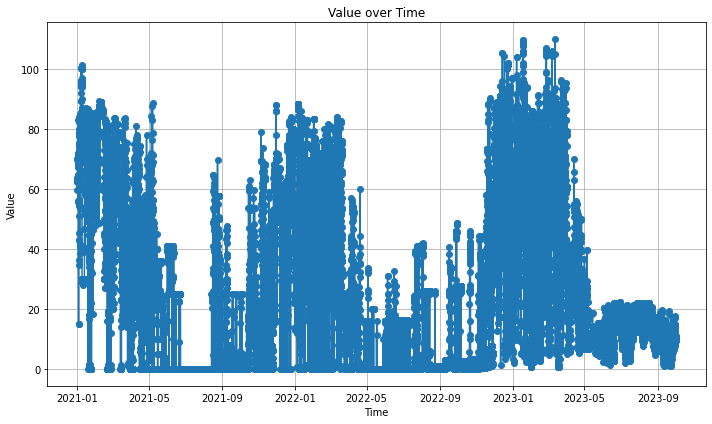

In [7]:
# Convert the columns to numpy arrays
x_values = dataframe['Datum'].to_numpy()
y_values = dataframe['DK2 FCRD upp'].to_numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Value over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

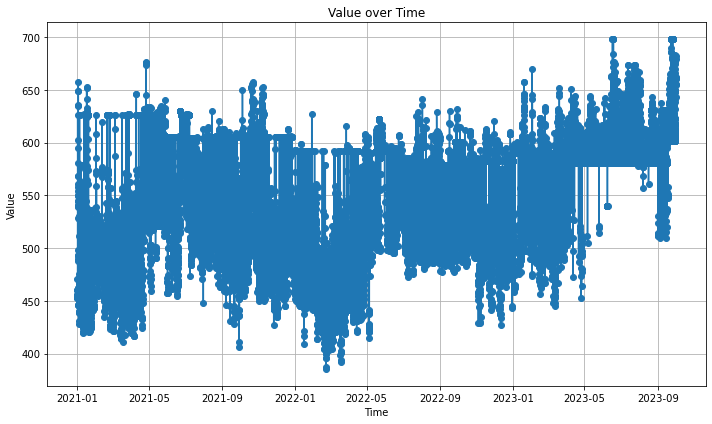

In [8]:
# Convert the columns to numpy arrays
x_values = dataframe['Datum'].to_numpy()
y_values = dataframe['Total FCRD upp'].to_numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Value over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Find the monthly averages and plot those

In [9]:
# copy of dataframe
copy_df = dataframe

In [10]:
# setting date as the index
copy_df.set_index('Datum', inplace=True)

In [11]:
# Calculate monthly averages
monthly_averages = copy_df.resample('M').mean()

In [12]:
# Remove the day from the index
monthly_averages.index = monthly_averages.index.to_period('M')

In [13]:
monthly_averages.T.head(15)

Datum,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
FCR-N Pris (EUR/MW),28.063611,24.768188,15.831025,18.786391,44.561770,52.027838,42.088473,30.196415,30.209234,43.528531,...,80.296688,52.806192,34.598981,43.078482,51.222974,95.057185,103.892778,125.924615,93.823114,64.720319
Total,246.180780,250.316220,261.185868,262.539722,254.909677,250.706528,254.854301,262.281452,263.201528,264.184966,...,241.673656,246.046371,245.290030,246.358681,249.705278,249.561156,246.831944,240.016801,239.895968,258.137639
SE1 FCRN,155.183199,132.179018,141.477927,136.455417,136.829570,126.245417,156.703898,162.683468,162.288611,150.435034,...,125.874328,109.316398,111.553423,112.624226,134.966528,119.367204,99.467083,97.439382,111.792742,85.671944
SE2 FCRN,62.089382,87.978720,84.591252,86.685833,85.226882,79.979444,69.168683,66.861156,79.886389,86.049128,...,89.796505,103.094892,107.823958,109.484657,85.596944,97.374328,103.075139,96.641935,108.553226,137.709722
SE3 FCRN,14.234409,15.857738,20.316151,23.435972,17.227823,33.018472,27.752957,26.438172,15.271111,14.857315,...,20.003629,24.223522,19.036310,13.708883,11.101944,18.039651,32.618194,34.551613,10.717608,27.182917
SE4 FCRN,1.635753,1.354018,1.096097,1.271250,1.122581,0.501111,0.304973,0.301882,0.567083,1.105772,...,0.395968,1.238844,2.605655,1.886810,1.764444,0.968414,0.592778,0.584812,1.439919,0.450278
DK2 FCRN,13.038038,12.946726,13.704441,14.691250,14.502823,10.962083,0.923790,5.996774,5.188333,11.737718,...,5.603226,8.172715,4.270685,8.654105,16.275417,13.811559,11.078750,10.799059,7.392473,7.122778
FCR-D upp Pris (EUR/MW),44.893167,48.505842,31.739608,32.704929,63.674653,55.438837,46.188055,36.640847,32.425352,40.199968,...,63.997997,42.622086,25.735629,32.530072,52.669387,71.896860,48.633534,34.044198,46.463413,27.588193
Total FCRD upp,488.476075,492.144048,487.934993,529.440417,574.583871,555.399028,548.766667,545.348118,523.158472,546.385503,...,538.962366,577.220027,565.885417,566.500135,586.487917,587.487769,594.433889,600.587366,588.777016,602.244028
SE1 FCRD upp,249.785887,198.908482,203.886676,214.305278,228.883468,216.015556,257.609543,236.813038,270.393056,303.699866,...,211.010484,166.538306,208.835268,209.390444,271.393472,258.092070,198.634583,211.950403,252.031183,225.119444


In [14]:
monthly_averages["Total FCRD upp"]

Datum
2021-01    488.476075
2021-02    492.144048
2021-03    487.934993
2021-04    529.440417
2021-05    574.583871
2021-06    555.399028
2021-07    548.766667
2021-08    545.348118
2021-09    523.158472
2021-10    546.385503
2021-11    516.098194
2021-12    510.102288
2022-01    496.868683
2022-02    457.907589
2022-03    473.342261
2022-04    497.110556
2022-05    569.038710
2022-06    576.087222
2022-07    547.593548
2022-08    556.977016
2022-09    544.726389
2022-10    549.222550
2022-11    540.162917
2022-12    538.962366
2023-01    577.220027
2023-02    565.885417
2023-03    566.500135
2023-04    586.487917
2023-05    587.487769
2023-06    594.433889
2023-07    600.587366
2023-08    588.777016
2023-09    602.244028
Freq: M, Name: Total FCRD upp, dtype: float64

In [15]:
monthly_averages["date"] = monthly_averages.index.astype(str).to_numpy()

plots

In [16]:
x_values = monthly_averages["date"].to_numpy()
y_values = monthly_averages['Total FCRD upp'].to_numpy()
z_values = monthly_averages['Total FCRD ned'].to_numpy()
yDK2_values = monthly_averages['DK2 FCRD upp'].to_numpy()
zDK2_values = monthly_averages['DK2 FCRD ned'].to_numpy()
zDK2_values[zDK2_values == 0] = np.nan

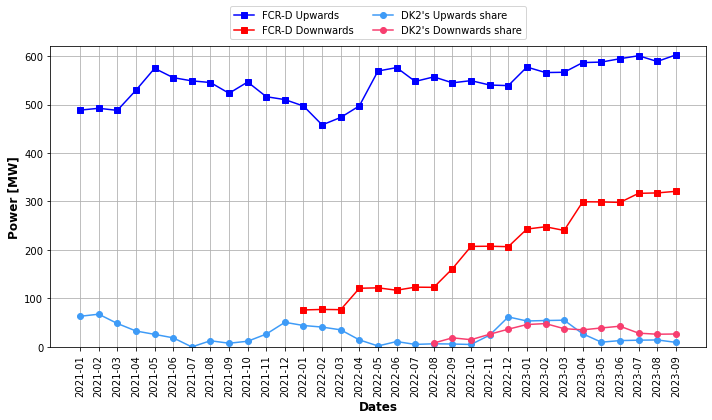

In [20]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, y_values, marker='s', color="blue", linestyle='-', label='FCR-D Upwards')
ax.plot(x_values, z_values, marker='s', color="red", linestyle='-', label='FCR-D Downwards')
ax.plot(x_values, yDK2_values, marker='o', color="#3e9bf7", linestyle='-', label="DK2's Upwards share")
ax.plot(x_values, zDK2_values, marker='o', color="#f73e6f", linestyle='-', label="DK2's Downwards share")
ax.set_xticks(ax.get_xticks()[::1])
ax.set_xticklabels(monthly_averages['date'][::1], rotation=90)
plt.ylabel('Power [MW]', fontsize=12, fontweight='bold')
plt.xlabel('Dates', fontsize=12, fontweight='bold')
#plt.title('Monthly average FCR-D Upwards bought in the Nordic grid area')
#plt.legend(fontsize='x-large')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.ylim(0,620)
plt.grid(True)
plt.tight_layout()
plt.show()